# Importing Required Packages

In [1]:
import os
import pandas as pd
import numpy as np
import xgboost
import sklearn
import matplotlib.pyplot as plt

# Setting the working directory

In [2]:
os.chdir(r'C:\Users\Rithesh\Desktop\MMT_Hackerearth')

# Importing the Train and Test Files

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
(train_data['id'].reset_index(drop = False)['id'] - train_data['id'].reset_index(drop = False)['index']).sum()

552

In [5]:
(test_data['id'].reset_index(drop = False)['id'] - test_data['id'].reset_index(drop = False)['index'] - 552).sum()

138

In [6]:
test_data['id'].reset_index(drop = False).head()

,index,id
0,0,553
1,1,554
2,2,555
3,3,556
4,4,557


# Data Exploration

## Column Types: Continuous, Categorical and Target

In [7]:
col_types = train_data.dtypes
col_types

id      int64
A      object
B     float64
C     float64
D      object
E      object
F      object
G      object
H     float64
I      object
J      object
K       int64
L      object
M      object
N     float64
O       int64
P       int64
dtype: object

In [8]:
categorical_cols = col_types[col_types=='object'].index.values
categorical_cols

array(['A', 'D', 'E', 'F', 'G', 'I', 'J', 'L', 'M'], dtype=object)

In [9]:
continuous_cols = col_types[col_types!='object'].index.values
continuous_cols = continuous_cols[[i not in ['P','id'] for i in continuous_cols]]
continuous_cols

array(['B', 'C', 'H', 'K', 'N', 'O'], dtype=object)

In [10]:
target_col = ['P']
target_col

['P']

# Column Exploration

In [11]:
train_data[continuous_cols].describe()

,B,C,H,K,N,O
count,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000
mean,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087
std,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000
75%,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000
max,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000


In [12]:
test_data[continuous_cols].describe()

,B,C,H,K,N,O
count,135.000000,138.000000,138.000000,138.000000,136.000000,138.000000
mean,32.385778,4.673080,2.080326,2.724638,219.227941,736.623188
std,12.301738,5.151458,2.938105,6.671399,231.864295,1742.379027
min,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.205000,0.970000,0.125000,0.000000,98.250000,0.000000
50%,29.500000,2.750000,0.980000,0.000000,171.000000,8.500000
75%,38.500000,5.781250,2.500000,3.000000,305.000000,500.000000
max,76.750000,25.085000,13.875000,67.000000,2000.000000,11177.000000


In [13]:
train_data[categorical_cols].apply(pd.Series.nunique)

A     2
D     3
E     3
F    14
G     9
I     2
J     2
L     2
M     3
dtype: int64

In [14]:
test_data[categorical_cols].apply(pd.Series.nunique)

A     2
D     2
E     2
F    14
G     8
I     2
J     2
L     2
M     3
dtype: int64

## Missing values exploration

In [15]:
train_data[continuous_cols].isnull().sum(axis = 0)

B     9
C     0
H     0
K     0
N    11
O     0
dtype: int64

In [16]:
train_data[categorical_cols].isnull().sum(axis = 0)

A    8
D    5
E    5
F    7
G    7
I    0
J    0
L    0
M    0
dtype: int64

In [17]:
test_data[continuous_cols].isnull().sum(axis = 0)

B    3
C    0
H    0
K    0
N    2
O    0
dtype: int64

In [18]:
test_data[categorical_cols].isnull().sum(axis = 0)

A    4
D    1
E    1
F    2
G    2
I    0
J    0
L    0
M    0
dtype: int64

# Plots

## Continuous vs Target Variable

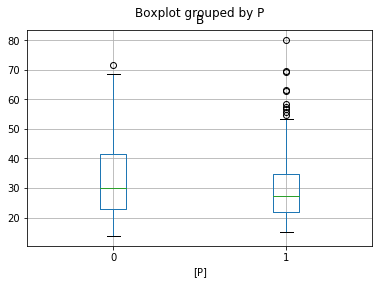

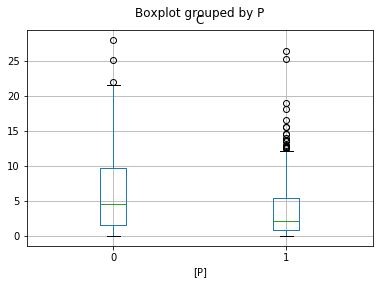

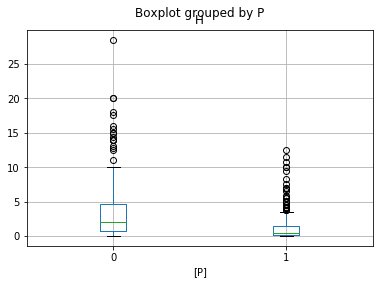

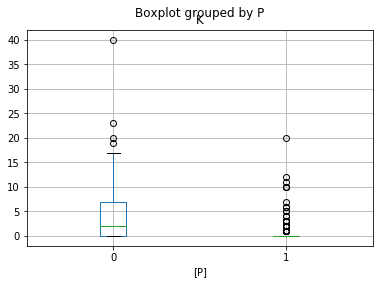

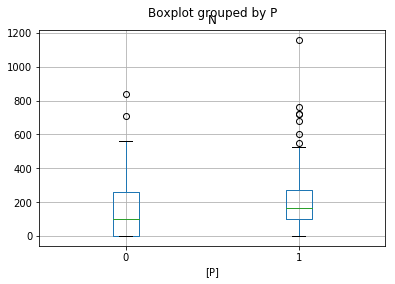

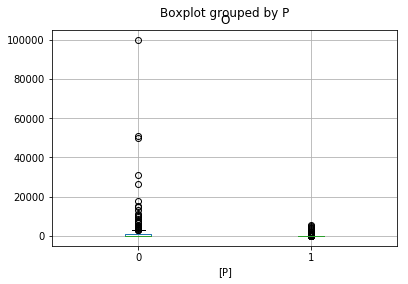

In [19]:
for i in continuous_cols:
    train_data[[i,target_col[0]]].boxplot(by = target_col[0])

# Data Preparation - Train Data

In [20]:
categorical_append_train_test = pd.concat([train_data[np.append(categorical_cols,['id'])],test_data[np.append(categorical_cols,['id'])]],axis = 0).reset_index(drop = True)

In [21]:
dummies_categorical_append_train_test = pd.concat([pd.get_dummies(categorical_append_train_test.drop('id',axis = 1)),categorical_append_train_test['id']], axis = 1)

In [22]:
dummies_categorical_append_train_test.loc[dummies_categorical_append_train_test['id']<=552,:].drop('id',axis = 1).shape

(552, 40)

## Creating Dummy Variables for categorical cols

In [23]:
train_data_after_dummies = dummies_categorical_append_train_test.loc[dummies_categorical_append_train_test['id']<=552,:].drop('id',axis = 1)
train_data_after_dummies.describe()

,A_a,A_b,D_l,D_u,D_y,E_g,E_gg,E_p,F_aa,F_c,...,G_z,I_f,I_t,J_f,J_t,L_f,L_t,M_g,M_p,M_s
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,...,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,0.307971,0.677536,0.003623,0.753623,0.233696,0.753623,0.003623,0.233696,0.076087,0.208333,...,0.012681,0.481884,0.518116,0.577899,0.422101,0.539855,0.460145,0.900362,0.012681,0.086957
std,0.462073,0.467843,0.060138,0.431291,0.423565,0.431291,0.060138,0.423565,0.265378,0.406485,...,0.111996,0.500125,0.500125,0.494343,0.494343,0.498861,0.498861,0.299788,0.111996,0.282027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Outliers Manipulation

In [25]:
train_data[continuous_cols].describe()

,B,C,H,K,N,O
count,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000
mean,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087
std,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000
75%,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000
max,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000


In [26]:
def rm_outliers(pd_series):
    quantile_75 = pd_series.quantile(0.75)
    quantile_25 = pd_series.quantile(0.25)
    iqr = 1.5*(quantile_75-quantile_25)
    conditions = [pd_series > quantile_75 + iqr,
                  pd_series < quantile_25 - iqr
                 ]
    choices = [quantile_75+iqr, quantile_25-iqr]
    pd_series_after = pd.Series(np.select(conditions,choices, default=pd_series))
    return pd_series_after

In [39]:
def rm_outliers_1(pd_series):
    quantile_95 = pd_series.quantile(0.95)
#     quantile_25 = pd_series.quantile(0.25)
#     iqr = 1.5*(quantile_75-quantile_25)
    conditions = [pd_series > quantile_95]
    choices = [quantile_95]
    pd_series_after = pd.Series(np.select(conditions,choices, default=pd_series))
    return pd_series_after

In [41]:
train_data_after_outliers = train_data[continuous_cols[continuous_cols!='O']].apply(rm_outliers)
train_data_after_outliers['O'] = rm_outliers_1(train_data['O'])

In [42]:
train_data_after_outliers.describe()

,B,C,H,K,N,O
count,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000
mean,31.203803,4.686185,1.848682,1.773551,172.295749,473.496014
std,11.399238,4.619427,2.100632,2.699463,143.945467,979.577622
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000
50%,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000
75%,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000
max,60.412500,17.403125,6.627500,7.500000,580.000000,3753.600000


## Missing Values Interpretation

In [43]:
train_data_after_nans =train_data_after_outliers.fillna(train_data_after_outliers.mean())
train_data_after_nans.describe()

,B,C,H,K,N,O
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,31.203803,4.686185,1.848682,1.773551,172.295749,473.496014
std,11.305757,4.619427,2.100632,2.699463,142.501381,979.577622
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.500000,1.000000,0.165000,0.000000,70.000000,0.000000
50%,28.500000,2.750000,1.000000,0.000000,160.000000,3.500000
75%,37.372500,7.561250,2.750000,3.000000,260.000000,364.750000
max,60.412500,17.403125,6.627500,7.500000,580.000000,3753.600000


## Normalization

In [44]:
def normalization(pd_series):
    pd_series_new = (pd_series - pd_series.mean())/pd_series.std()
    return pd_series_new

In [45]:
train_data_after_normalization = train_data_after_nans.apply(normalization)
train_data_after_normalization.describe()

,B,C,H,K,N,O
count,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02,5.520000e+02
mean,-8.310582e-16,3.159208e-16,-6.082091e-16,-9.674226e-17,2.180221e-16,-1.998200e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.543798e+00,-1.014452e+00,-8.800600e-01,-6.570012e-01,-1.209081e+00,-4.833675e-01
25%,-7.698558e-01,-7.979746e-01,-8.015122e-01,-6.570012e-01,-7.178579e-01,-4.833675e-01
50%,-2.391528e-01,-4.191398e-01,-4.040128e-01,-6.570012e-01,-8.628512e-02,-4.797946e-01
75%,5.456244e-01,6.223856e-01,4.290699e-01,4.543308e-01,6.154625e-01,-1.110132e-01
max,2.583524e+00,2.752926e+00,2.274943e+00,2.121329e+00,2.861055e+00,3.348488e+00


## Final Train Dataset after Cleaning

In [46]:
train_data_after_clean = pd.concat([train_data_after_normalization,train_data_after_dummies,train_data[target_col]],axis = 1)

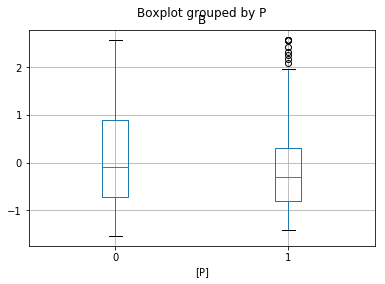

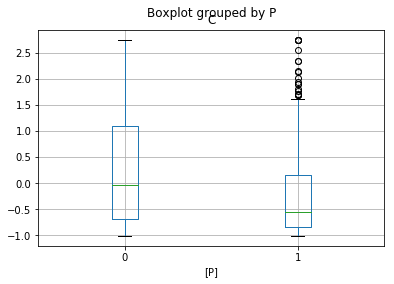

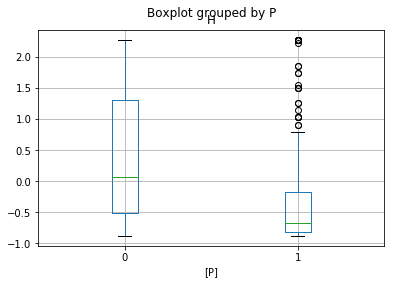

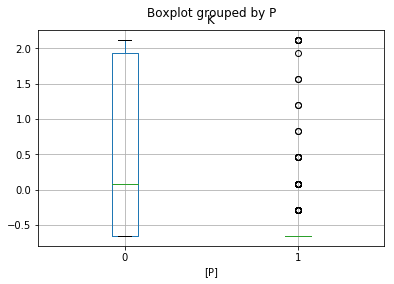

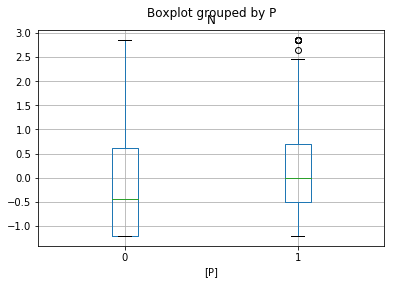

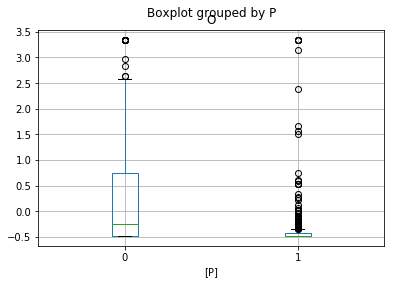

In [47]:
for i in continuous_cols:
    train_data_after_clean[[i,target_col[0]]].boxplot(by = target_col[0])

# Data Preparation - Test Data

## Creating Dummy Variables for categorical cols

In [48]:
test_data_after_dummies = dummies_categorical_append_train_test.loc[dummies_categorical_append_train_test['id']>552,:].drop('id',axis = 1).reset_index(drop = True)
test_data_after_dummies.describe()

,A_a,A_b,D_l,D_u,D_y,E_g,E_gg,E_p,F_aa,F_c,...,G_z,I_f,I_t,J_f,J_t,L_f,L_t,M_g,M_p,M_s
count,138.000000,138.000000,138.0,138.000000,138.000000,138.000000,138.0,138.000000,138.000000,138.000000,...,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,0.289855,0.681159,0.0,0.746377,0.246377,0.746377,0.0,0.246377,0.086957,0.159420,...,0.007246,0.456522,0.543478,0.550725,0.449275,0.550725,0.449275,0.927536,0.007246,0.065217
std,0.455348,0.467725,0.0,0.436669,0.432470,0.436669,0.0,0.432470,0.282798,0.367401,...,0.085126,0.499921,0.499921,0.499232,0.499232,0.499232,0.499232,0.260199,0.085126,0.247809
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.250000,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Missing Values Interpretation

In [49]:
test_data[continuous_cols].describe()

,B,C,H,K,N,O
count,135.000000,138.000000,138.000000,138.000000,136.000000,138.000000
mean,32.385778,4.673080,2.080326,2.724638,219.227941,736.623188
std,12.301738,5.151458,2.938105,6.671399,231.864295,1742.379027
min,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.205000,0.970000,0.125000,0.000000,98.250000,0.000000
50%,29.500000,2.750000,0.980000,0.000000,171.000000,8.500000
75%,38.500000,5.781250,2.500000,3.000000,305.000000,500.000000
max,76.750000,25.085000,13.875000,67.000000,2000.000000,11177.000000


In [50]:
test_data_after_nans =test_data[continuous_cols].fillna(train_data_after_outliers.mean())
test_data_after_nans.describe()

,B,C,H,K,N,O
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,32.360083,4.673080,2.080326,2.724638,218.547764,736.623188
std,12.167531,5.151458,2.938105,6.671399,230.234462,1742.379027
min,15.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.330000,0.970000,0.125000,0.000000,99.250000,0.000000
50%,29.835000,2.750000,0.980000,0.000000,172.295749,8.500000
75%,38.377500,5.781250,2.500000,3.000000,302.250000,500.000000
max,76.750000,25.085000,13.875000,67.000000,2000.000000,11177.000000


## Normalization

In [51]:
def normalization_using_train(pd_series):
    name_series = pd_series.name
    pd_series_new = (pd_series - train_data_after_nans[name_series].mean())/train_data_after_nans[name_series].std()
    return pd_series_new

In [52]:
test_data_after_normalization = test_data_after_nans.apply(normalization_using_train)
test_data_after_normalization.describe()

,B,C,H,K,N,O
count,138.000000,138.000000,138.000000,138.000000,1.380000e+02,138.000000
mean,0.102274,-0.002837,0.110273,0.352324,3.245724e-01,0.268613
std,1.076224,1.115172,1.398677,2.471380,1.615665e+00,1.778704
min,-1.359821,-1.014452,-0.880060,-0.657001,-1.209081e+00,-0.483368
25%,-0.607991,-0.804469,-0.820554,-0.657001,-5.125968e-01,-0.483368
50%,-0.121071,-0.419140,-0.413534,-0.657001,1.994487e-16,-0.474690
75%,0.634517,0.237056,0.310058,0.454331,9.119508e-01,0.027057
max,4.028584,4.415876,5.725095,24.162745,1.282587e+01,10.926652


## Final Test Dataset after Cleaning

In [53]:
test_data_after_clean = pd.concat([test_data['id'],test_data_after_normalization,test_data_after_dummies],axis = 1)
test_data_after_clean.shape

(138, 47)

# XGBoost - Modelling

In [54]:
xgb_model = xgboost.XGBClassifier(seed = 1, nthread=1)

In [57]:
kfold = sklearn.model_selection.StratifiedKFold(n_splits=4, random_state=1)
results = sklearn.model_selection.cross_val_score(xgb_model, train_data_after_clean.drop(target_col, axis = 1), train_data_after_clean[target_col[0]], cv=kfold, scoring = 'neg_log_loss')
print("Accuracy: %.2f (%.2f)" % (results.mean(), results.std()))

Accuracy: -0.32 (0.03)


In [58]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': 1,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 1,
 'silent': True,
 'subsample': 1}

In [59]:
predictors = train_data_after_clean.columns.values[train_data_after_clean.columns.values!=target_col[0]]
predictors

array(['B', 'C', 'H', 'K', 'N', 'O', 'A_a', 'A_b', 'D_l', 'D_u', 'D_y',
       'E_g', 'E_gg', 'E_p', 'F_aa', 'F_c', 'F_cc', 'F_d', 'F_e', 'F_ff',
       'F_i', 'F_j', 'F_k', 'F_m', 'F_q', 'F_r', 'F_w', 'F_x', 'G_bb',
       'G_dd', 'G_ff', 'G_h', 'G_j', 'G_n', 'G_o', 'G_v', 'G_z', 'I_f',
       'I_t', 'J_f', 'J_t', 'L_f', 'L_t', 'M_g', 'M_p', 'M_s'],
      dtype=object)

In [60]:
train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]

0.552536231884058

In [61]:
gridsearch_sample = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
                                                                                           , max_depth = 5
                                                                                           , min_child_weight = 1
                                                                                           , gamma = 0
                                                                                           , subsample = 0.8
                                                                                           , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1),
                                     param_grid={
                                         'learning_rate':[i/20.0 for i in range(6,0,-1)],
                                         'n_estimators':range(10,100,10)
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample.grid_scores_, gridsearch_sample.best_params_, gridsearch_sample.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.31794, std: 0.02266, params: {'learning_rate': 0.3, 'n_estimators': 10},
  mean: -0.31369, std: 0.03547, params: {'learning_rate': 0.3, 'n_estimators': 20},
  mean: -0.31666, std: 0.03686, params: {'learning_rate': 0.3, 'n_estimators': 30},
  mean: -0.32492, std: 0.03220, params: {'learning_rate': 0.3, 'n_estimators': 40},
  mean: -0.33593, std: 0.03876, params: {'learning_rate': 0.3, 'n_estimators': 50},
  mean: -0.34359, std: 0.04174, params: {'learning_rate': 0.3, 'n_estimators': 60},
  mean: -0.34395, std: 0.04054, params: {'learning_rate': 0.3, 'n_estimators': 70},
  mean: -0.34563, std: 0.03930, params: {'learning_rate': 0.3, 'n_estimators': 80},
  mean: -0.35004, std: 0.04231, params: {'learning_rate': 0.3, 'n_estimators': 90},
  mean: -0.32852, std: 0.01847, params: {'learning_rate': 0.25, 'n_estimators': 10},
  mean: -0.31537, std: 0.02611, params: {'learning_rate': 0.25, 'n_estimators': 20},
  mean: -0.31669, std: 0.01791, params: {'learning_rate': 0.25, 'n_estimat

In [63]:
gridsearch_sample_1 = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , learning_rate = 0.1
                                                                                           , n_estimators = 70
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
#                                                                                            , max_depth = 5
#                                                                                            , min_child_weight = 1
                                                                                           , gamma = 0
                                                                                           , subsample = 0.8
                                                                                           , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1),
                                     param_grid={
                                         'max_depth':range(1,10),
                                         'min_child_weight': [i/10 for i in range(5,12)]
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample_1.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample_1.grid_scores_, gridsearch_sample_1.best_params_, gridsearch_sample_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.32924, std: 0.01961, params: {'max_depth': 1, 'min_child_weight': 0.5},
  mean: -0.32929, std: 0.01955, params: {'max_depth': 1, 'min_child_weight': 0.6},
  mean: -0.32929, std: 0.01955, params: {'max_depth': 1, 'min_child_weight': 0.7},
  mean: -0.32929, std: 0.01955, params: {'max_depth': 1, 'min_child_weight': 0.8},
  mean: -0.32929, std: 0.01955, params: {'max_depth': 1, 'min_child_weight': 0.9},
  mean: -0.32929, std: 0.01955, params: {'max_depth': 1, 'min_child_weight': 1.0},
  mean: -0.32929, std: 0.01955, params: {'max_depth': 1, 'min_child_weight': 1.1},
  mean: -0.30128, std: 0.02627, params: {'max_depth': 2, 'min_child_weight': 0.5},
  mean: -0.30262, std: 0.02656, params: {'max_depth': 2, 'min_child_weight': 0.6},
  mean: -0.30443, std: 0.02720, params: {'max_depth': 2, 'min_child_weight': 0.7},
  mean: -0.30580, std: 0.02521, params: {'max_depth': 2, 'min_child_weight': 0.8},
  mean: -0.30435, std: 0.02611, params: {'max_depth': 2, 'min_child_weight': 0.9},
  me

In [64]:
gridsearch_sample_1 = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , learning_rate = 0.1
                                                                                           , n_estimators = 70
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
                                                                                           , max_depth = 5
                                                                                           , min_child_weight = 0.9
#                                                                                            , gamma = 0
                                                                                           , subsample = 0.8
                                                                                           , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1),
                                     param_grid={
                                         'gamma': [i/10.0 for i in range(0,11)]
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample_1.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample_1.grid_scores_, gridsearch_sample_1.best_params_, gridsearch_sample_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.29272, std: 0.03314, params: {'gamma': 0.0},
  mean: -0.29711, std: 0.03772, params: {'gamma': 0.1},
  mean: -0.30052, std: 0.03785, params: {'gamma': 0.2},
  mean: -0.29557, std: 0.02964, params: {'gamma': 0.3},
  mean: -0.29404, std: 0.03104, params: {'gamma': 0.4},
  mean: -0.29881, std: 0.03018, params: {'gamma': 0.5},
  mean: -0.30119, std: 0.03111, params: {'gamma': 0.6},
  mean: -0.29861, std: 0.03080, params: {'gamma': 0.7},
  mean: -0.29598, std: 0.03036, params: {'gamma': 0.8},
  mean: -0.29704, std: 0.03080, params: {'gamma': 0.9},
  mean: -0.30158, std: 0.02667, params: {'gamma': 1.0}],
 {'gamma': 0.0},
 -0.2927156073883501)

In [65]:
gridsearch_sample_1 = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , learning_rate = 0.1
                                                                                           , n_estimators = 80
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
                                                                                           , max_depth = 5
                                                                                           , min_child_weight = 0.9
                                                                                           , gamma = 0
                                                                                           , subsample = 0.8
                                                                                           , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1),
                                     param_grid={
                                         'n_estimators': range(50,100,5),
                                         'learning_rate':[i/20.0 for i in range(6,0,-1)],
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample_1.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample_1.grid_scores_, gridsearch_sample_1.best_params_, gridsearch_sample_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.33364, std: 0.02773, params: {'learning_rate': 0.3, 'n_estimators': 50},
  mean: -0.33631, std: 0.02698, params: {'learning_rate': 0.3, 'n_estimators': 55},
  mean: -0.33735, std: 0.02574, params: {'learning_rate': 0.3, 'n_estimators': 60},
  mean: -0.33983, std: 0.02834, params: {'learning_rate': 0.3, 'n_estimators': 65},
  mean: -0.34377, std: 0.03077, params: {'learning_rate': 0.3, 'n_estimators': 70},
  mean: -0.34398, std: 0.02693, params: {'learning_rate': 0.3, 'n_estimators': 75},
  mean: -0.34464, std: 0.02737, params: {'learning_rate': 0.3, 'n_estimators': 80},
  mean: -0.34573, std: 0.02802, params: {'learning_rate': 0.3, 'n_estimators': 85},
  mean: -0.35127, std: 0.02884, params: {'learning_rate': 0.3, 'n_estimators': 90},
  mean: -0.35157, std: 0.02678, params: {'learning_rate': 0.3, 'n_estimators': 95},
  mean: -0.32569, std: 0.03174, params: {'learning_rate': 0.25, 'n_estimators': 50},
  mean: -0.32815, std: 0.03310, params: {'learning_rate': 0.25, 'n_estimato

In [66]:
gridsearch_sample_1 = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , learning_rate = 0.1
                                                                                           , n_estimators = 70
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
                                                                                           , max_depth = 5
                                                                                           , min_child_weight = 0.9
                                                                                           , gamma = 0
#                                                                                            , subsample = 0.8
#                                                                                            , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1),
                                     param_grid={
                                         'subsample': [i/20.0 for i in range(4,20)],
                                         'colsample_bytree': [i/20.0 for i in range(8,21)]
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample_1.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample_1.grid_scores_, gridsearch_sample_1.best_params_, gridsearch_sample_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.32339, std: 0.02862, params: {'colsample_bytree': 0.4, 'subsample': 0.2},
  mean: -0.31605, std: 0.03083, params: {'colsample_bytree': 0.4, 'subsample': 0.25},
  mean: -0.30289, std: 0.03335, params: {'colsample_bytree': 0.4, 'subsample': 0.3},
  mean: -0.31255, std: 0.02792, params: {'colsample_bytree': 0.4, 'subsample': 0.35},
  mean: -0.31171, std: 0.02604, params: {'colsample_bytree': 0.4, 'subsample': 0.4},
  mean: -0.30960, std: 0.02173, params: {'colsample_bytree': 0.4, 'subsample': 0.45},
  mean: -0.31313, std: 0.02722, params: {'colsample_bytree': 0.4, 'subsample': 0.5},
  mean: -0.31859, std: 0.02787, params: {'colsample_bytree': 0.4, 'subsample': 0.55},
  mean: -0.31087, std: 0.02586, params: {'colsample_bytree': 0.4, 'subsample': 0.6},
  mean: -0.30544, std: 0.03482, params: {'colsample_bytree': 0.4, 'subsample': 0.65},
  mean: -0.30348, std: 0.03701, params: {'colsample_bytree': 0.4, 'subsample': 0.7},
  mean: -0.29926, std: 0.03308, params: {'colsample_bytree':

In [67]:
gridsearch_sample_1 = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , learning_rate = 0.1
                                                                                           , n_estimators = 70
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
                                                                                           , max_depth = 5
                                                                                           , min_child_weight = 0.9
                                                                                           , gamma = 0
                                                                                           , subsample = 0.8
                                                                                           , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1),
                                     param_grid={
                                         'reg_alpha':[1e-10,1e-8,1e-6,1e-5,1e-4,1e-3,1e-2, 0.1, 1, 100]
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample_1.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample_1.grid_scores_, gridsearch_sample_1.best_params_, gridsearch_sample_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.29272, std: 0.03314, params: {'reg_alpha': 1e-10},
  mean: -0.29272, std: 0.03314, params: {'reg_alpha': 1e-08},
  mean: -0.29272, std: 0.03314, params: {'reg_alpha': 1e-06},
  mean: -0.29272, std: 0.03314, params: {'reg_alpha': 1e-05},
  mean: -0.29272, std: 0.03314, params: {'reg_alpha': 0.0001},
  mean: -0.29336, std: 0.03459, params: {'reg_alpha': 0.001},
  mean: -0.29627, std: 0.03742, params: {'reg_alpha': 0.01},
  mean: -0.30112, std: 0.03828, params: {'reg_alpha': 0.1},
  mean: -0.29931, std: 0.02908, params: {'reg_alpha': 1},
  mean: -0.68762, std: 0.00039, params: {'reg_alpha': 100}],
 {'reg_alpha': 0.0001},
 -0.29271541802219886)

In [68]:
gridsearch_sample_1 = sklearn.model_selection.GridSearchCV(estimator = xgboost.XGBClassifier(seed = 1
                                                                                           , learning_rate = 0.01
                                                                                           , n_estimators = 750
                                                                                           , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                                                                                           , nthread=1
                                                                                           , max_depth = 5
                                                                                           , min_child_weight = 0.9
                                                                                           , gamma = 0
                                                                                           , subsample = 0.8
                                                                                           , colsample_bytree = 0.8
                                                                                           , scale_pos_weight = 1
                                                                                           , reg_alpha = 0.0001),
                                     param_grid={
                                         'n_estimators':range(600,710,10)
                                     },         
                                     scoring = 'neg_log_loss',
                                     n_jobs= 1,
                                     iid = False,
                                     cv = 4)
gridsearch_sample_1.fit(train_data_after_clean[predictors],train_data_after_clean[target_col[0]])
gridsearch_sample_1.grid_scores_, gridsearch_sample_1.best_params_, gridsearch_sample_1.best_score_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: -0.30004, std: 0.03351, params: {'n_estimators': 600},
  mean: -0.29982, std: 0.03373, params: {'n_estimators': 610},
  mean: -0.29962, std: 0.03345, params: {'n_estimators': 620},
  mean: -0.29984, std: 0.03349, params: {'n_estimators': 630},
  mean: -0.29977, std: 0.03384, params: {'n_estimators': 640},
  mean: -0.29974, std: 0.03395, params: {'n_estimators': 650},
  mean: -0.29980, std: 0.03396, params: {'n_estimators': 660},
  mean: -0.29998, std: 0.03434, params: {'n_estimators': 670},
  mean: -0.29978, std: 0.03437, params: {'n_estimators': 680},
  mean: -0.29979, std: 0.03459, params: {'n_estimators': 690},
  mean: -0.29990, std: 0.03483, params: {'n_estimators': 700}],
 {'n_estimators': 620},
 -0.29961878559260385)

In [69]:
xgb_model_tuned = xgboost.XGBClassifier(seed = 1
                      , learning_rate = 0.01
                      , n_estimators = 620
                      , base_score = train_data_after_clean[target_col[0]].sum()/train_data_after_clean.shape[0]
                      , nthread=1
                      , max_depth = 5
                      , min_child_weight = 0.9
                      , gamma = 0
                      , subsample = 0.8
                      , colsample_bytree = 0.8
                      , scale_pos_weight = 1
                      , reg_alpha = 0.0001)

In [70]:
kfold = sklearn.model_selection.StratifiedKFold(n_splits=4, random_state=1)
results = sklearn.model_selection.cross_val_score(xgb_model_tuned, train_data_after_clean.drop(target_col, axis = 1), train_data_after_clean[target_col[0]], cv=kfold,scoring='neg_log_loss')
# print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print("Log Loss: %.3f (%.2f)" % (results.mean(), results.std()))

Log Loss: -0.300 (0.03)


In [71]:
fitted_xgb_tuned = xgb_model_tuned.fit(train_data_after_clean.drop(target_col, axis = 1),train_data_after_clean[target_col[0]])

In [72]:
predicted_prob = fitted_xgb_tuned.predict_proba(train_data_after_clean.drop(target_col, axis = 1))[:,1]

In [73]:
print(predicted_prob.mean())
print(predicted_prob.max())
print(predicted_prob.min())

0.553907
0.99167776
0.005399354


In [74]:
final_df = pd.concat([pd.Series(predicted_prob),train_data_after_clean[target_col[0]]],axis = 1)
final_df.columns = ['predicted_prob','actuals']

In [75]:
final_df.head()

,predicted_prob,actuals
0,0.703131,1
1,0.984105,1
2,0.986053,1
3,0.180059,0
4,0.031174,0


In [76]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(train_data_after_clean[target_col[0]],predicted_prob)

In [77]:
fpr

array([0.        , 0.        , 0.00404858, 0.00404858, 0.00809717,
       0.00809717, 0.01619433, 0.01619433, 0.02024291, 0.02024291,
       0.0242915 , 0.0242915 , 0.04048583, 0.04048583, 0.06477733,
       0.06477733, 1.        ])

In [78]:
tpr

array([0.00327869, 0.85245902, 0.85245902, 0.90491803, 0.90491803,
       0.94754098, 0.94754098, 0.96393443, 0.96393443, 0.97377049,
       0.97377049, 0.99344262, 0.99344262, 0.99672131, 0.99672131,
       1.        , 1.        ])

In [79]:
cut_off = thresholds[np.argmax(tpr - fpr)]

In [80]:
final_df['Prediction_Flag'] = final_df['predicted_prob'].map(lambda x: 1 if x > cut_off else 0)

In [81]:
sklearn.metrics.accuracy_score(final_df['actuals'],final_df['Prediction_Flag'])

0.9836956521739131

In [82]:
sklearn.metrics.confusion_matrix(final_df['actuals'],final_df['Prediction_Flag'])

array([[241,   6],
       [  3, 302]], dtype=int64)

In [83]:
tn, fp, fn, tp = sklearn.metrics.confusion_matrix(final_df['actuals'],final_df['Prediction_Flag']).ravel()

In [84]:
predicted_prob_test = fitted_xgb_tuned.predict_proba(test_data_after_clean.drop('id', axis = 1))[:,1]

In [85]:
predictions_df = pd.concat([test_data['id'],pd.Series(predicted_prob_test).map(lambda x: 1 if x > cut_off else 0)], axis = 1)
predictions_df.columns = ['id','P']
test_data.shape[0] == predictions_df.shape[0]

True

In [86]:
predictions_df.to_csv('predictions_v1.csv',index = False)